<div class="cell border-box-sizing text_cell rendered"><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h1 align="center" style="font-family:Arial;color:#6c6c6c;font-size:30px;">Lab 3: Classification (cont.)</h1>
</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered"><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h2 style="font-family:Arial;color:#6c6c6c;font-size:25px;">Decision Trees</h2><p><strong>Decision Trees</strong> are a friendly kind of model for classification, since they are interpretable and easy
to apply. They are implemented in the <code>DecisionTreeClassifier</code> of <code>sklearn.tree</code> package.</p>
<p>In general, algorithms for training decision trees choose the best variable to split the dataset, in a manner that in
each branch we will have a smaller mixture of classes. Then the algorithm repeats in the same way for each branch, until
it reaches a <i>pure leaf</i> (a node with all the records of the same class) or there are no more variables to split
the data.</p>
<p>The choice of the best variable is done according to a <code>criterion</code>: <code>entropy</code> and <code>giny</code>
for implementing the <i>information gain</i> and <i>giny impurity</i> functions, respectively.</p>
<p>Among the several parameters, the <code>max_depth</code> determines the maximum size of the tree to reach, implementing
a pre-pruning strategy. Other parameters with similar effects are the <code>min_samples_leaf</code>,
<code>min_samples_split</code> and <code>min_impurity_decrease</code> thresholds, that avoid continuing growing the
tree.</p>
<p>The <code>min_impurity_decrease</code> parameter implements the post-pruning strategy, since it only splits some node,
if it brings more accuracy to the model.</p>

<Figure size 600x450 with 0 Axes>

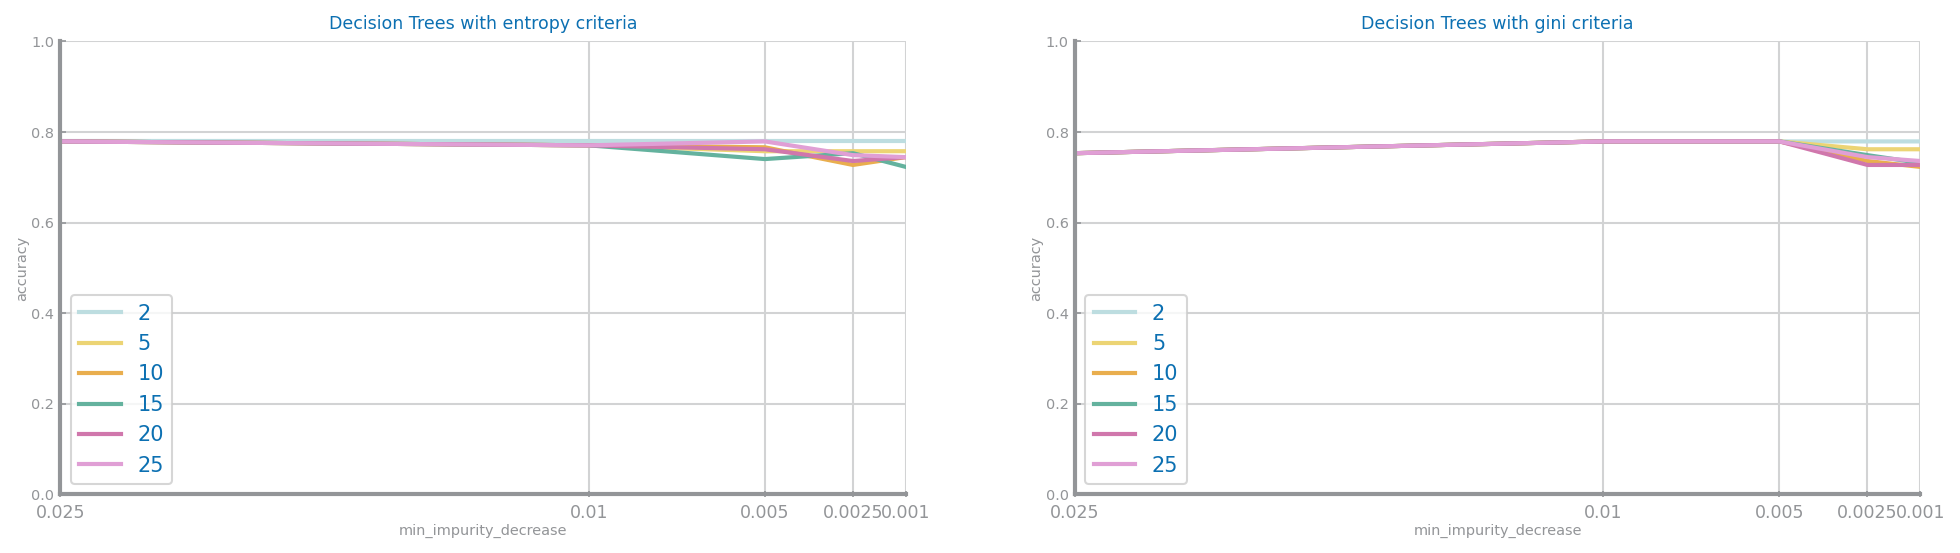

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.78


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('data/diabetes.csv')
y: np.ndarray = data.pop('class').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

n = 1
min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

<div class="cell border-box-sizing text_cell rendered"><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p>In order to show the learned tree, we can use the <code>graphviz</code> package.</p>

</div>
</div>
</div>

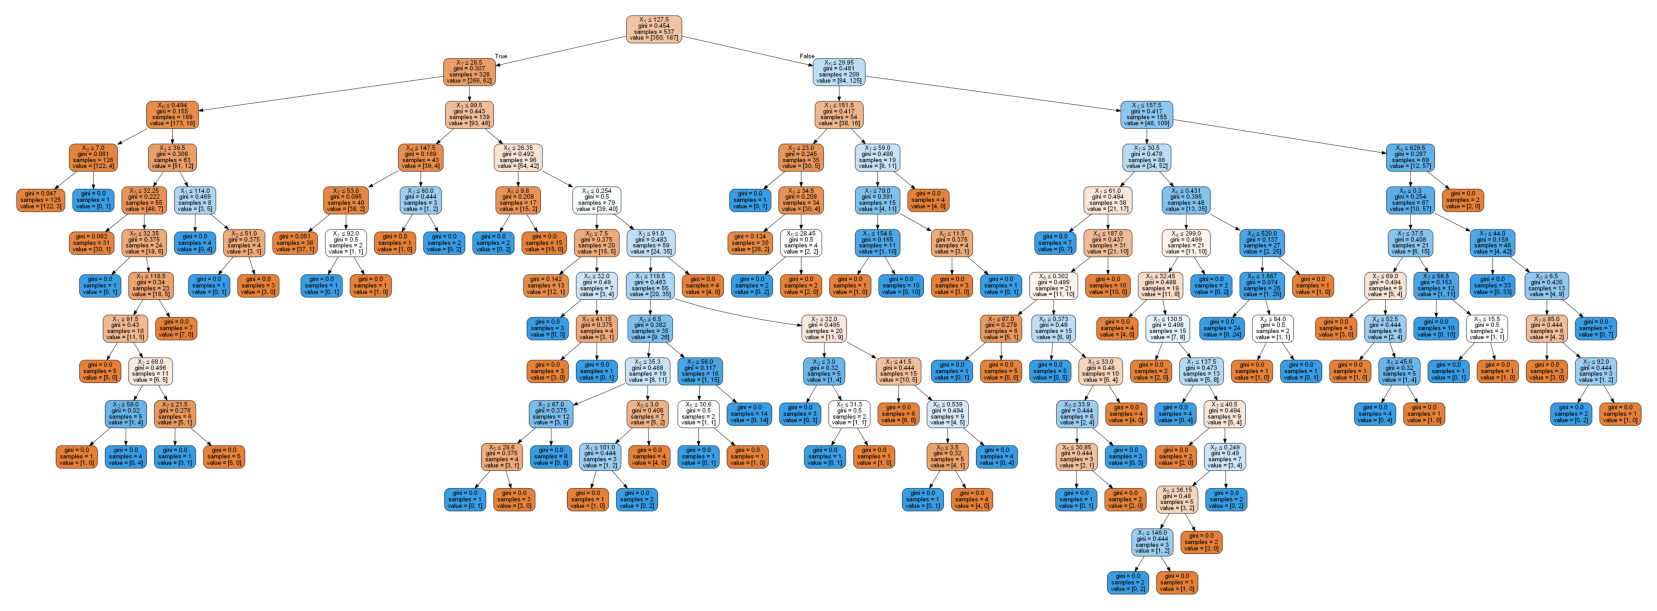

In [2]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file='dtree.dot', filled=True, rounded=True, special_characters=True)
# Convert to png
#from subprocess import call
#call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])

import pydot

(graph,) = pydot.graph_from_dot_file('dtree.dot')
graph.write_png('dtree.png')

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('dtree.png'))
plt.axis('off')
plt.show()

<div class="cell border-box-sizing text_cell rendered"><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p>After the plot you can see the parameters for which the best results were achieved. So let's see its performance, in
that context  in terms of other metrics.</p>

</div>
</div>
</div>

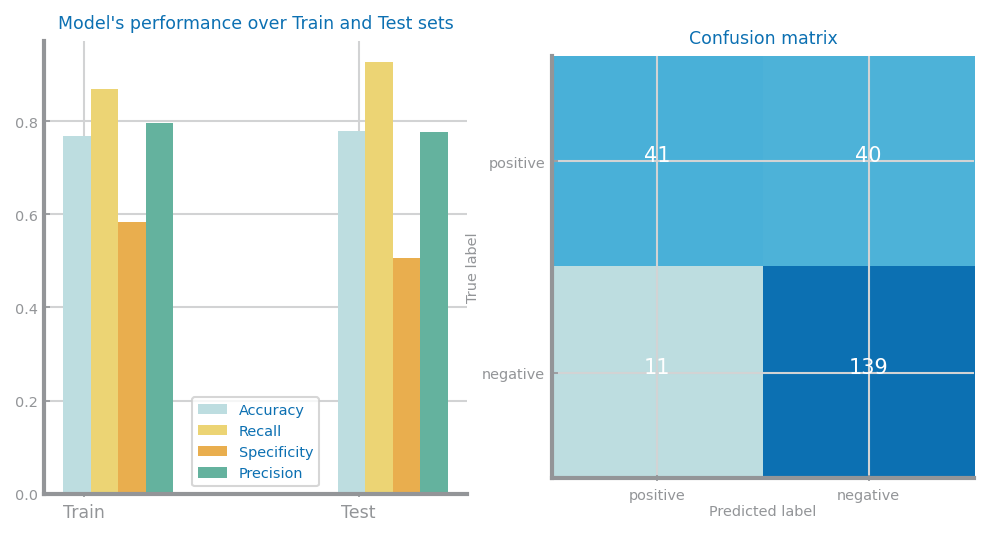

In [3]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)